# Parse trajectories from H Sumata

Obtained calculated backtrajectories used in Sumata et al 2022 from Hiroshi.

Here: Parsing them to a format of my preference.

In [1]:
#Imports 
import pickle
import datetime
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
from matplotlib.dates import date2num 
import numpy as np
import datetime
%matplotlib widget

### Run Hiroshis utility class definition
.. so we can load the trajectory objects.

In [2]:
%run '../files_from_hiroshi/trajectory_util.py'

/home/oyvindl/work/code/python/SeaIceBacktrack/validation/trajectory_vs_sumata_new/files_from_hiroshi/trajectory_util.py:403: SyntaxWarning: invalid escape sequence '\ '
  sys.exit('ERROR: data does not exit, \    fname =' + fname)


# Load trajectories
Load Hiroshi's back trajectories

In [3]:
ddir_hiroshi = '../files_from_hiroshi/'

In [4]:
with open(f'{ddir_hiroshi}/FS.2018.01.backward_traj.731_days.n_8.pkl', 'rb') as f:
    trajectories = pickle.load(f) 

In [5]:
datasets = []

for traj in trajectories:

    start_time = traj.stamps[0]
    if start_time>datetime.date(2017, 1, 1):
        lonlats = np.array(traj.lonlats)
        xys = np.array(traj.pos_xys)
        
        lons, lats = lonlats[:, 0], lonlats[:, 1]
        xs, ys = xys[:, 0], xys[:, 1]
        time = [np.datetime64(tstmp, 'ns') for tstmp in np.array(traj.stamps)]
        
        # Create the dataset
        ds = xr.Dataset(
            coords={'TIME': time},
            data_vars={'lon': (('TIME'), lons),
                      'lat': (('TIME'), lats),
                      'x': (('TIME'), xs),
                      'y': (('TIME'), ys)}
        )
        datasets += [ds]

In [6]:
from kval.maps import quickmap

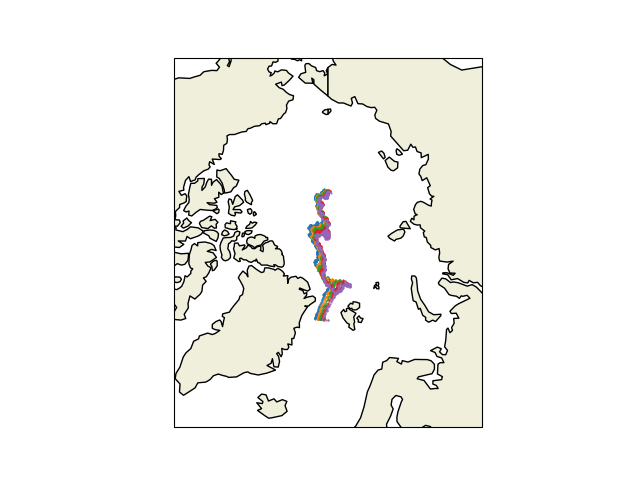

In [7]:
fig = plt.figure()
ax = quickmap.quick_map_stere(0, 90, height = 6e3, width = 5e3, coast_resolution='110m', fig = fig)
for ds in datasets:
    ax.plot(ds.lon, ds.lat, '.', ms = 1, transform = ccrs.PlateCarree())